Датасет: Breast Cancer Wisconsin (Diagnostic) Dataset

Описание задачи: Построение модели (логистическая регрессия) для диагностики рака молочной железы на основе признаков, полученных из цифровых изображений биопсий.

Метрики оценки модели: Accuracy, Precision, Recall, F1-score, ROC-AUC.

Dataset форма: (569, 30), Target shape: (569,) 

Признаки: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension'] 

Метки классов (target): ['malignant' 'benign'] 

Форма X_train: (398, 30), y_train: (398,) 

Форма X_test: (171, 30), y_test: (171,) 

Предсказанные значения: [1 0 0 1 1 0 0 0 1 1] 

Истинные значения: [1 0 0 1 1 0 0 0 1 1] 

Accuracy: 0.98
Precision: 0.98
Recall: 0.98
F1-score: 0.98
ROC-AUC: 1.00 



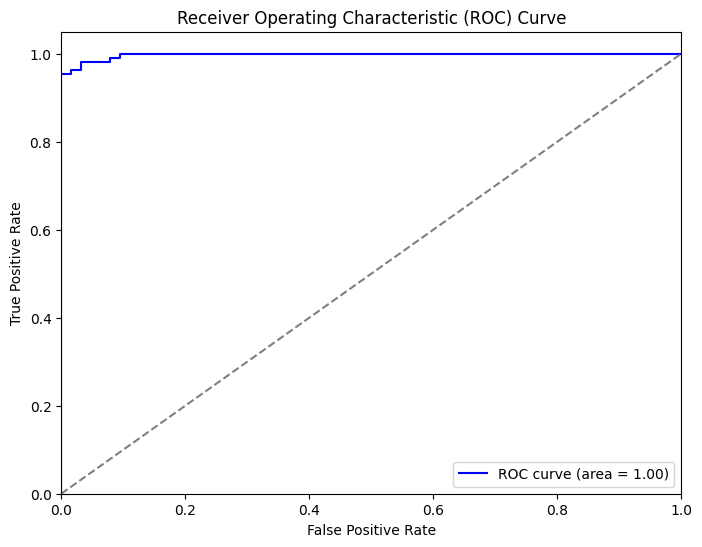

In [7]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Загрузка датасета
data = load_breast_cancer()
X = data.data
y = data.target

# Промежуточный вывод
print(f'Dataset форма: {X.shape}, Target shape: {y.shape}', '\n')
print(f'Признаки: {data.feature_names}', '\n')
print(f'Метки классов (target): {data.target_names}', '\n')

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Промежуточный вывод
print(f'Форма X_train: {X_train.shape}, y_train: {y_train.shape}', '\n')
print(f'Форма X_test: {X_test.shape}, y_test: {y_test.shape}', '\n')

# Обучение модели (логистическая регрессия)
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

# Предсказание на тестовой выборке
y_pred = model.predict(X_test)

# Промежуточный вывод
print(f'Предсказанные значения: {y_pred[:10]}', '\n')
print(f'Истинные значения: {y_test[:10]}', '\n')

# Вычисление метрик
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

# Вывод результатов
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-score: {f1:.2f}')
print(f'ROC-AUC: {roc_auc:.2f}', '\n')

# ROC-кривая
fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


________________________________________________________________________________________________________________________________________________

 Задача: Линейная регрессия с использованием датасета Diabetes

Датасет: Diabetes Dataset

Описание задачи: Предсказание прогрессирования диабета у пациентов на основе различных медицинских показателей.


Dataset форма: (442, 10), Target shape: (442,) 

Признаки: ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'] 

Предсказанные значения: [138.46970031 181.10052342 125.34400904 292.75977277 123.8830531
  91.89830434 257.26463123 177.76169318  84.98549706 109.15960992] 

Истинные значения: [219.  70. 202. 230. 111.  84. 242. 272.  94.  96.] 

Mean Squared Error: 2821.75
R^2 Score: 0.48


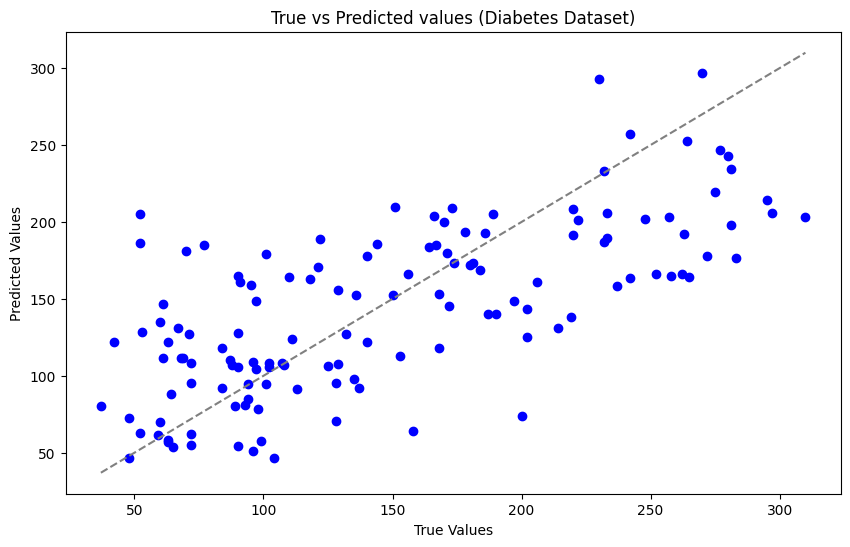

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Загрузка датасета
data = load_diabetes()
X = data.data
y = data.target

# Промежуточный вывод
print(f'Dataset форма: {X.shape}, Target shape: {y.shape}', '\n')
print(f'Признаки: {data.feature_names}', '\n')
#print(f'Метки классов (target): {data.target_names}', '\n')

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Обучение модели (линейная регрессия)
model = LinearRegression()
model.fit(X_train, y_train)

# Предсказание на тестовой выборке
y_pred = model.predict(X_test)

# Промежуточный вывод
print(f'Предсказанные значения: {y_pred[:10]}', '\n')
print(f'Истинные значения: {y_test[:10]}', '\n')

# Вычисление метрик
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Вывод результатов
print(f'Mean Squared Error: {mse:.2f}')
print(f'R^2 Score: {r2:.2f}')

# График
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='gray')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted values (Diabetes Dataset)')
plt.show()



Каждая строка в data.data представляет собой одного пациента, а каждый столбец — определенный медицинский показатель. Признаки включают:


**Индекс массы тела (BMI)**

**Артериальное давление**

**Липопротеиды низкой плотности (LDL)**

**Липопротеиды высокой плотности (HDL)**

**Общее количество холестерина**

**Триглицериды**

**Холестерин в крови после 1 часа глюкозного толерантного теста**

**Холестерин в крови после 2 часов глюкозного толерантного теста**

**и т.д.**


Значения признаков были стандартизированы, поэтому они не находятся в привычных для нас единицах измерения.

data.target — это массив целевых переменных, которые мы пытаемся предсказать. В данном случае, целевая переменная — это прогрессирование диабета через год после измерения признаков.


Целевые значения — это числовые значения, которые показывают степень прогрессирования диабета для каждого пациента через год.

________________________________________________________________________________________________________________________________________________

Обучение моделей с помощью линейной регрессии, логистической регрессии, дерева решений и случайного леса имеет разные подходы, алгоритмы и применения.

### 1. Линейная регрессия (Linear Regression)

#### Основные характеристики:
- **Цель:** Моделирование зависимости между непрерывной целевой переменной и одной или несколькими независимыми переменными.
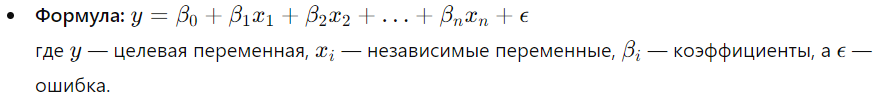-
- **Метод:** Моделирование линейной зависимости. Метод наименьших квадратов (OLS) используется для нахождения коэффициентов, минимизирующих сумму квадратов ошибок.
- **Тип задачи:** Регрессия (предсказание непрерывных значений).
- **Примеры использования:** Прогнозирование цен, прогнозирование спроса, анализ тенденций.

#### Преимущества:
- Простота и интерпретируемость.
- Быстро обучается на больших данных.

#### Недостатки:
- Не подходит для моделирования сложных нелинейных зависимостей.
- Чувствителен к выбросам и мультиколлинеарности.

### 2. Логистическая регрессия (Logistic Regression)

#### Основные характеристики:
- **Цель:** Моделирование вероятности принадлежности наблюдения к одному из двух классов (или нескольким классам в случае многоклассовой логистической регрессии).
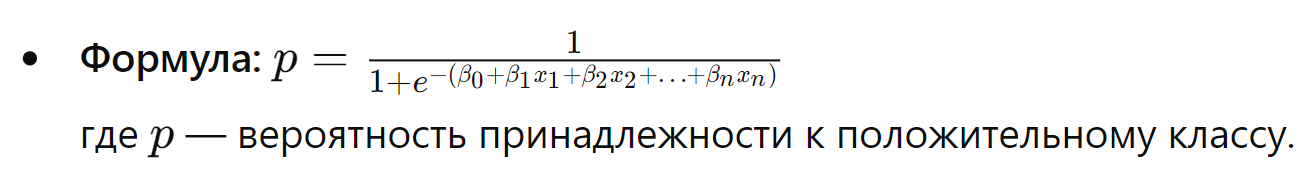
- **Метод:** Используется логистическая функция (сигмоида), чтобы предсказать вероятность события. Моделирование осуществляется с помощью метода максимального правдоподобия.
- **Тип задачи:** Классификация (двоичная или многоклассовая).
- **Примеры использования:** Оценка вероятности дефолта по кредитам, медицинская диагностика, маркетинговые кампании.

#### Преимущества:
- Простота и интерпретируемость.
- Подходит для двоичной классификации и многоклассовых задач.

#### Недостатки:
- Неэффективна при наличии сложных нелинейных зависимостей.
- Требует линейной зависимости между признаками и логарифмом шансов.



### Сравнение

1. **Линейная регрессия** используется для предсказания непрерывных значений и предполагает линейную связь между признаками и целевой переменной. Она проста и эффективна для линейных зависимостей.

2. **Логистическая регрессия** применяется для бинарной или многоклассовой классификации и моделирует вероятность принадлежности к классу. Она проста и интерпретируема, но требует линейных зависимостей.


Выбор модели зависит от задачи, объема и сложности данных, а также требований к интерпретируемости и производительности.